## SSAI-3D: Training Demo


This notebook is designed for sparse fine-tuning of a model on any user provided anisotropic dataset.

⏱️ **Run time:** 5–30 minutes, depending on the dataset.

---

For broader generalizable testing across multiple datasets, please refer to:


```general_test_model.ipynb``` 

---


#### Preparations
import needed packages.

In [1]:
from basicsr.trainer import Surgeon, SurgeonTrainer
from basicsr.data import restore_volume, semi_synthetic_creation, \
     generate_raw_data, generate_zs_dataset, adjust_contrast, denoised_semi_synthetic_creation
from basicsr.model_train import trainer_train, restore
from easydict import EasyDict
import numpy as np 
import os

Load anisotropic raw stack, generated semi-synthetic dataset, as well as zero-shot dataset

In [2]:
raw_tif_pth, kernel_num, project_depth, data_pth = \
    './raw_data.tif', 3, 5, './demo_dataset'

In [3]:
semi_synthetic_creation(raw_tif_pth = raw_tif_pth, save_pth = data_pth, \
    kernel_num = kernel_num, project_depth = project_depth, downsample_rate = 5,  rotation = False)

generate_raw_data(raw_pth = raw_tif_pth, save_pth= data_pth, dr = 5)
generate_zs_dataset(data_pth)

uint16


TiffFileError: not a TIFF file b'\x89PNG'

Obtain zero-shot metrics as well as the relative performance of each layer within the network via a pre-trained surgeon network

In [4]:
configs = EasyDict({
    'model_path' : f'./experiments/pretrained_models/NAFNet-REDS-width64.pth',
    'lq_pth': os.path.join(data_pth, 'zs_lq'),
    'gt_pth': os.path.join(data_pth, 'zs_gt'),
    'lr': 1e-4
})
operation = Surgeon(configs)
operation.get_zeroshot_information()
surgeon_trainer = SurgeonTrainer()
elementwise_input = operation.input_dict.copy()
rank = surgeon_trainer.forward_all(elementwise_input)

Disable distributed.
none
rank: 0
ws: 1


/home/youlab/Desktop/workspace/jiashu/projects/SSAI-3D/basicsr/models/base_model.py:277: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  load_net = torch.load(
2024-10-25 16:5

 load net keys <built-in method keys of dict object at 0x744029ac1200>
.. cosineannealingLR
grad_norm
snip
grasp
fisher


/home/youlab/anaconda3/envs/learned_uncertainty/lib/python3.9/site-packages/torch/nn/modules/module.py:1827: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


plain
synflow


#### Training the network

In [5]:
trainer_train(rank, data_pth)

Disable distributed.


2024-10-25 16:55:06,381 INFO: 
                ____                _       _____  ____
               / __ ) ____ _ _____ (_)_____/ ___/ / __ \
              / __  |/ __ `// ___// // ___/\__ \ / /_/ /
             / /_/ // /_/ /(__  )/ // /__ ___/ // _, _/
            /_____/ \__,_//____//_/ \___//____//_/ |_|
     ______                   __   __                 __      __
    / ____/____   ____   ____/ /  / /   __  __ _____ / /__   / /
   / / __ / __ \ / __ \ / __  /  / /   / / / // ___// //_/  / /
  / /_/ // /_/ // /_/ // /_/ /  / /___/ /_/ // /__ / /<    /_/
  \____/ \____/ \____/ \____/  /_____/\____/ \___//_/|_|  (_)
    
Version Information: 
	BasicSR: 1.2.0+154b7b3
	PyTorch: 2.5.0+cu118
	TorchVision: 0.20.0+cu118
2024-10-25 16:55:06,382 INFO: 
  name: demo_neurons
  model_type: ImageRestorationModel
  scale: 1
  num_gpu: 1
  manual_seed: 10
  datasets:[
    train:[
      name: reds-train
      type: PairedImageDataset
      dataroot_gt: ./demo_dataset/gt
      dataroot_lq: ./de

none


2024-10-25 16:55:07,465 INFO: Loading NAFNetLocal model from ./experiments/pretrained_models/NAFNet-REDS-width64.pth.
2024-10-25 16:55:07,669 INFO: Model [ImageRestorationModel] is created.


 load net keys <built-in method keys of dict object at 0x743fc6cb3300>
.. cosineannealingLR


2024-10-25 16:55:08,560 INFO: Start training from epoch: 0, iter: 0
2024-10-25 16:55:53,878 INFO: [demo_..][epoch:  0, iter:     200, lr:(9.055e-05,)] [eta: 0:03:03, time (data): 0.221 (0.002)] l_pix: -4.1558e+01 
2024-10-25 16:56:38,310 INFO: [demo_..][epoch:  0, iter:     400, lr:(6.563e-05,)] [eta: 0:02:15, time (data): 0.227 (0.002)] l_pix: -3.4132e+01 
2024-10-25 16:57:00,383 INFO: Saving models and training states.
2024-10-25 16:57:23,121 INFO: [demo_..][epoch:  0, iter:     600, lr:(3.476e-05,)] [eta: 0:01:29, time (data): 0.223 (0.002)] l_pix: -4.3958e+01 
2024-10-25 16:58:07,446 INFO: [demo_..][epoch:  1, iter:     800, lr:(9.732e-06,)] [eta: 0:00:44, time (data): 0.220 (0.002)] l_pix: -4.4920e+01 
2024-10-25 16:58:51,624 INFO: [demo_..][epoch:  1, iter:   1,000, lr:(1.002e-07,)] [eta: 0:00:00, time (data): 0.220 (0.002)] l_pix: -4.4340e+01 
2024-10-25 16:58:51,625 INFO: Saving models and training states.
2024-10-25 16:58:52,086 INFO: End of training. Time consumed: 0:03:43
20

#### Resolution Restoration

In [6]:
data_pth = './demo_dataset'
in_pth_xz = os.path.join(data_pth, 'test_xz')
in_pth_yz = os.path.join(data_pth, 'test_yz')
out_root = './results'
out_pth_xz = os.path.join(out_root, 'test_xz')
out_pth_yz = os.path.join(out_root, 'test_yz')
# Currently set batch size to 1 to be compatible with smaller GPUs, can be adjusted as needed to speed up inference.
restore(input_pth = in_pth_xz,\
        output_pth = out_pth_xz,\
        model_pth =  '../experiments/demo_neurons/models/net_g_latest.pth', dtype = np.uint8)

restore(input_pth = in_pth_yz,\
        output_pth = out_pth_yz,\
        model_pth =  '../experiments/demo_neurons/models/net_g_latest.pth', dtype = np.uint8)

Disable distributed.
none


2024-10-25 16:59:02,093 INFO: Loading NAFNetLocal model from ../experiments/demo_neurons/models/net_g_latest.pth.
2024-10-25 16:59:02,292 INFO: Model [ImageRestorationModel] is created.


 load net keys <built-in method keys of collections.OrderedDict object at 0x743fc6a119c0>


100%|██████████| 500/500 [00:36<00:00, 13.81it/s]

Disable distributed.


none


2024-10-25 16:59:39,368 INFO: Loading NAFNetLocal model from ../experiments/demo_neurons/models/net_g_latest.pth.
2024-10-25 16:59:39,556 INFO: Model [ImageRestorationModel] is created.


 load net keys <built-in method keys of collections.OrderedDict object at 0x743fc6716b40>


100%|██████████| 400/400 [00:37<00:00, 10.81it/s]


In [8]:
import tifffile
tmp = tifffile.imread('./raw_data.tif')

In [12]:
tmp.dtype.name

'uint16'

Average from XZ and YZ directions

In [13]:
xz, yz, av = restore_volume(in_pth_xz, out_pth_xz, out_pth_yz)

100%|██████████| 400/400 [00:02<00:00, 138.91it/s]


#### Visualization

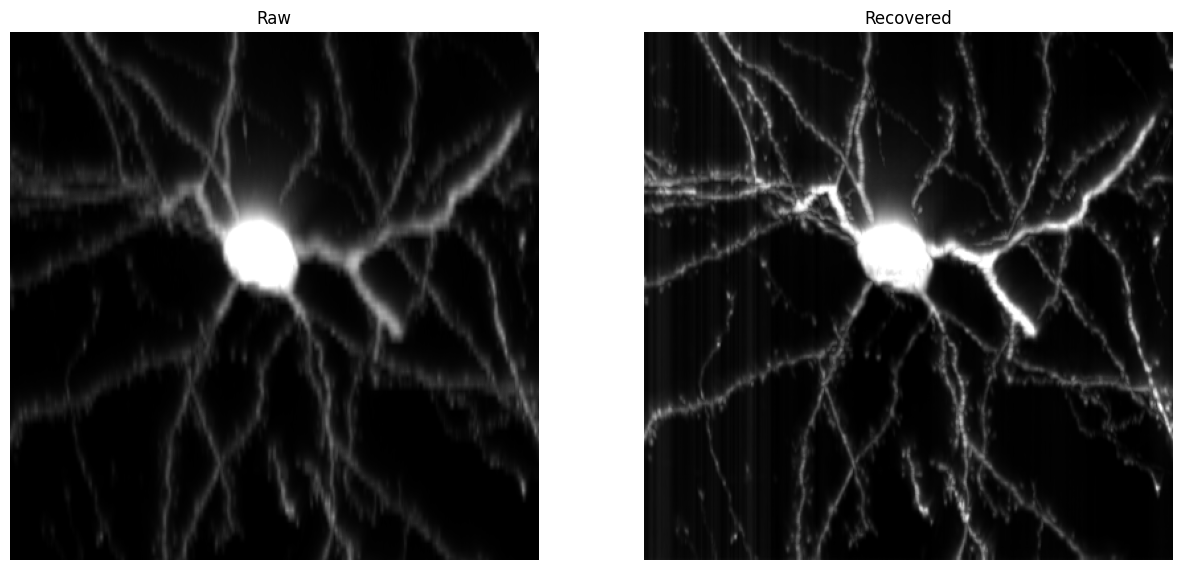

In [14]:
import tifffile
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
raw_tif_pth = './raw_data.tif'
raw = tifffile.imread(raw_tif_pth)

slice_idx = 200
depth = 200
figs, axs = plt.subplots(1, 2, figsize=(15, 15))
axs[0].imshow(adjust_contrast(cv2.resize(np.amax(raw[:, :, slice_idx:slice_idx + depth], -1), (1153, 194*5))[:400, :400]), cmap='gray')
axs[0].axis('off')
axs[0].set_title('Raw')
axs[1].imshow(adjust_contrast(np.amax(av[slice_idx:slice_idx + depth], 0)[:400, :400]), cmap='gray')
axs[1].axis('off')
axs[1].set_title('Recovered')
plt.show()


## Resolution Enhancement with Denoising

##### First create denoised semi-synthetic data

In [1]:
from basicsr.trainer import Surgeon, SurgeonTrainer
from basicsr.data import restore_volume, semi_synthetic_creation, \
     generate_raw_data, generate_zs_dataset, adjust_contrast, denoised_semi_synthetic_creation
from basicsr.model_train import trainer_train, restore
from easydict import EasyDict
import os
raw_tif_pth, kernel_num, project_depth, data_pth = \
    './raw_data.tif', 3, 5, './demo_dataset'

In [3]:
semi_synthetic_creation(raw_tif_pth = raw_tif_pth, save_pth = data_pth, \
    kernel_num = kernel_num, project_depth = project_depth, downsample_rate = 5,  rotation = False)

generate_raw_data(raw_pth = raw_tif_pth, save_pth= data_pth, dr = 5)
generate_zs_dataset(data_pth)


In [2]:
restore(input_pth='./demo_dataset/test_xy',output_pth='./demo_dataset/denoised_gt',model_pth= './experiments/pretrained_models/denoising_model.pth', denoise = True) 
denoised_semi_synthetic_creation(input_pth = './demo_dataset/denoised_gt',output_pth = './demo_dataset/',
    kernel_num = 3, downsample_rate = 5,  rotation = False)

Disable distributed.
none
 load net keys <built-in method keys of collections.OrderedDict object at 0x7f91cf91bcc0>


Current net - loaded net:
  ending.bias
  ending.weight
Loaded net - current net:
  ending.lower.bias
  ending.lower.weight
  ending.prediction.bias
  ending.prediction.weight
  ending.upper.bias
  ending.upper.weight
Size different, ignore [intro.weight]: crt_net: torch.Size([64, 3, 3, 3]); load_net: torch.Size([64, 5, 3, 3])
2024-09-20 17:03:44,522 INFO: Model [ImageRestorationModel] is created.
100%|██████████| 80/80 [00:09<00:00,  8.84it/s]


In [ ]:
trainer_train(rank, './demo_dataset/denoised_gt_train', './demo_dataset/denoised_lq_train')

In [ ]:
data_pth = './demo_dataset'
in_pth_xz = os.path.join(data_pth, 'test_xz')
in_pth_yz = os.path.join(data_pth, 'test_yz')
out_root = './demo_dataset/denoised_results'
out_pth_xz = os.path.join(out_root, 'test_xz')
out_pth_yz = os.path.join(out_root, 'test_yz')
# Currently set batch size to 1 to be compatible with smaller GPUs, can be adjusted as needed to speed up inference.
restore(input_pth = in_pth_xz,\
        output_pth = out_pth_xz,\
        model_pth = './experiments/pretrained_models/denoising_model.pth', denoise = True)
        # './experiments/pretrained_models/denoising_model.pth', denoise = True)

restore(input_pth = in_pth_yz,\
        output_pth = out_pth_yz,\
        model_pth =  './experiments/pretrained_models/denoising_model.pth', denoise = True)


data_pth = './demo_dataset/denoised_results'
in_pth_xz = os.path.join(data_pth, 'test_xz')
in_pth_yz = os.path.join(data_pth, 'test_yz')
out_root = './results/deconved_denoised_results'
out_pth_xz = os.path.join(out_root, 'test_xz')
out_pth_yz = os.path.join(out_root, 'test_yz')
restore(input_pth = in_pth_xz,\
        output_pth = out_pth_xz,\
        model_pth =  '../experiments/demo_neurons/models/net_g_latest.pth')

restore(input_pth = in_pth_yz,\
        output_pth = out_pth_yz,\
        model_pth =  '../experiments/demo_neurons/models/net_g_latest.pth')


In [3]:
xz, yz, av = restore_volume(in_pth_xz, out_pth_xz, out_pth_yz)

100%|██████████| 400/400 [00:04<00:00, 95.85it/s] 


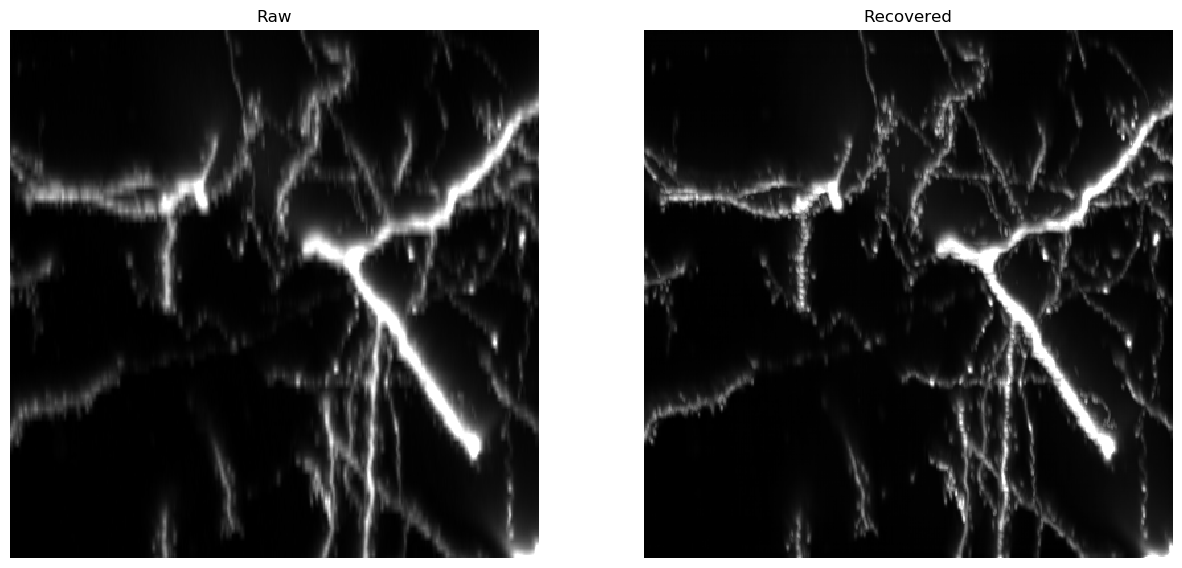

In [13]:
import tifffile
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
raw_tif_pth = './raw_data.tif'
raw = tifffile.imread(raw_tif_pth)

slice_idx = 100
depth = 200
figs, axs = plt.subplots(1, 2, figsize=(15, 15))
axs[0].imshow(adjust_contrast(cv2.resize(np.amax(raw[:, :, slice_idx:slice_idx + depth], -1), (1153, 194*5))[:400, :400]), cmap='gray')
axs[0].axis('off')
axs[0].set_title('Raw')
axs[1].imshow(adjust_contrast(np.amax(av[slice_idx:slice_idx + depth], 0)[:400, :400]), cmap='gray')
axs[1].axis('off')
axs[1].set_title('Recovered')
plt.show()